### 비지도 변환과 군집
* 차원 축소(PCA)

### 왜 비지도 학습을 사용하는가? 
1. 시각화
2. 데이터의 많은 특성을 몇개의 압축적인 특성(feature)로 줄임
3. 추가적인 처리(주로 지도학습에 이용하기 위함)

### PCA(Principal component analysis)
* 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술.
* 데이터의 회전 후 데이터 설명도에 따라 중요성이 판단되고, 새로운 데이터중의 일부 데이터가 선택됨.

### PCA 알고리즘
* 제일 먼저 '성분1'의 분산이 가장 큰 방향을 찾는다
  * 이 방향이 데이터에서 가장 많은 정보를 담고 있는 방향이 된다.
* 첫 번째 방향과 직각인 방향 중, 가장 많은 정보를 담는 방향을 찾는다.(두번째 주성분)
  * 2차원에서는 하나 존재,
  * 고차원에서는 (무한히) 많은 직각 방향이 있을 수 있음.

#### 이 과정을 거쳐 찾은 방향의 데이터는 주된 분산의 방향이라 해서 주성분이라 함.

In [1]:
import mglearn

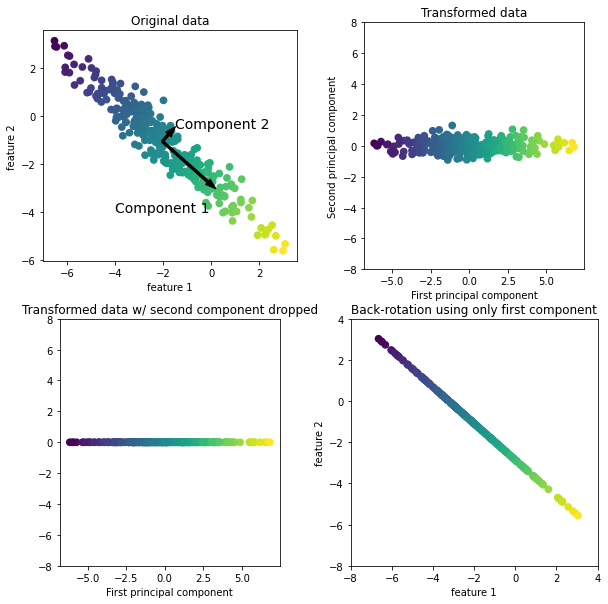

In [2]:
mglearn.plots.plot_pca_illustration()

In [4]:
#%%
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

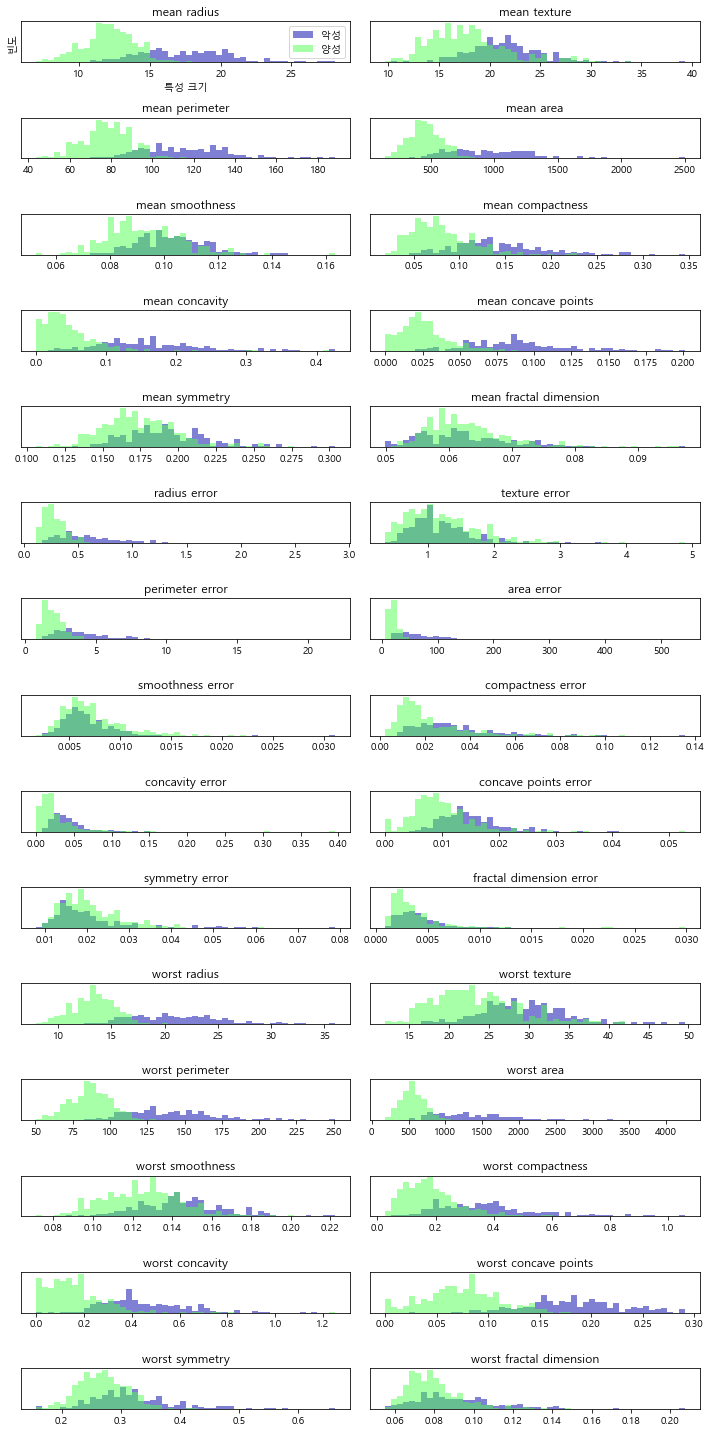

In [6]:
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

- 산점도는 변수와 변수간의 관계.
- 히스토그램 그려보는 이유 : 분포

- StandardScaler : 평균 0, 분산 1로 변경
- RubustScaler : 평균-중간값, 분산-사분위값을 사용
- MinMaxScaler : 0-1사이로 변경
- Normizer : 유클리디안 거리가 1이 되도록 포인트 조정 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


(array([  5.,  43.,  93., 150., 143.,  78.,  34.,  19.,   1.,   3.]),
 array([-2.68269492, -2.01888802, -1.35508111, -0.69127421, -0.02746731,
         0.6363396 ,  1.3001465 ,  1.9639534 ,  2.6277603 ,  3.29156721,
         3.95537411]),
 <BarContainer object of 10 artists>)

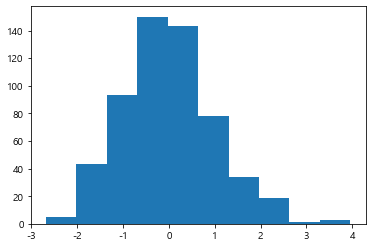

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

print(cancer.feature_names)
plt.hist(X_scaled[:,24])

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([-1.45444309, -0.7839459 , -0.1134487 ,  0.55704849,  1.22754568,
         1.89804287,  2.56854006,  3.23903725,  3.90953444,  4.58003163,
         5.25052883]),
 <BarContainer object of 10 artists>)

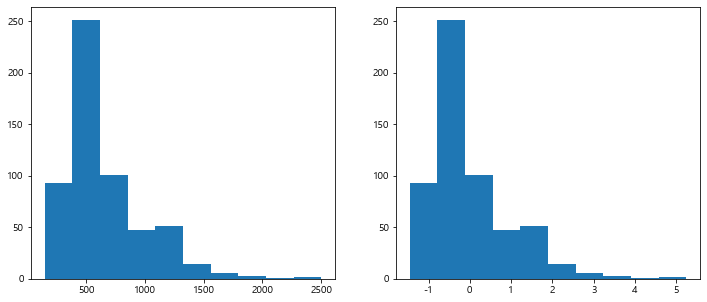

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(cancer.data[ : , 3]) # min area 원본 데이터

plt.subplot(1,2,2)
plt.hist(X_scaled[ : , 3]) # mean area 변경 데이터

In [13]:
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 생성
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [14]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [15]:
import numpy as numpy
np.sum(pca.explained_variance_ratio_)

0.6324320765155942

Text(0, 0.5, '두 번째 주성분')

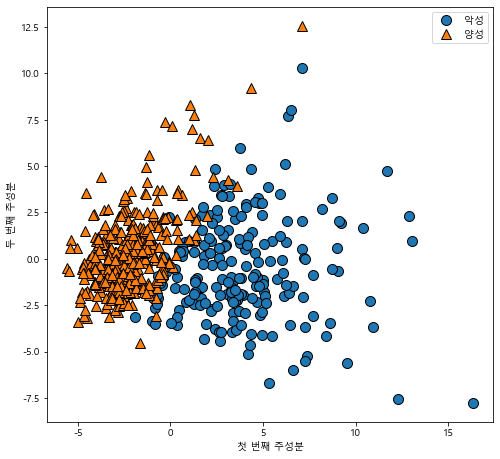

In [16]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [17]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [18]:
# Z1 = 0.2189*X1 + 0.1037*X2 + ... + 0.1317*X30
# Z2 = ....

Text(0, 0.5, '주성분')

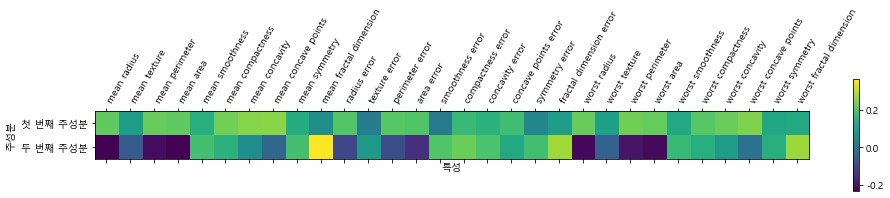

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")